In [131]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

**Context**

The company we work for produces digital cameras. The error made during the process of manufacturing is $p_0$=0.01. It means that out of 100 cameras, 1 is faulty. 

In order to lower the error we review the whole process. Some "weak" points are detected and fixed. To see if the error is lower than 0.001, we made the following experiment: 5000 cameras are procuded and inspected. 3 out of these 5000 are faulty, which means that 3/5000=0.006<0.01. Is the new error rate $p$ (which is unknown) lower than the original one ($p_0$=0.01)?

In order to anser this question we perform and hypothesis test:

 \begin{cases} 
     H_0 & p= 0.01 \\
     H_1 & p\lt 0.001
\end{cases}

We want a test with a 95% significance level.

In [137]:
def binomail_values(p0, n, n_success):
    
    sample_mean = n_success/n
    population_mean = p0
    population_variance = p0 * (1-p0)/n
    population_sd = np.sqrt(population_variance)
    
    print('Hypothesis test ---------------------------------------------------------')
    print('\tH0: p={} \n\t  vs\n\tH1: p<{}'.format(p0, p0))
    print('Statistics --------------------------------------------------------------')
    print('\tSample Mean: {}'.format(sample_mean))
    print('\tPopulation Mean: {}'.format(population_mean))
    print('\tPopulation Variance: {}'.format(population_variance))
    print('\tPopulation SD: {}'.format(population_sd))
    
    print('\nPlots -------------------------------------------------------------------')
    q1 = stats.norm.ppf(0.05/2, population_mean, population_sd)
    q2 = stats.norm.ppf(1-0.05/2, population_mean, population_sd)
    
    x = np.linspace(population_mean - 3*population_sd, population_mean + 3*population_sd, 1000)
    y = stats.norm.pdf(x, population_mean, population_sd)
    
    print('\tp_hat = (X_1 + X_2 + ··· + X_n)/n')
    plt.plot(x, y)
    plt.title('Probability distribution for p_hat under H0')
    
    plt.axvline(x=sample_mean, color='k', linestyle='--')
    plt.text(sample_mean, np.mean(y), 'Sample Mean', rotation=90)
    
    plt.axvline(x=population_mean, color='k', linestyle='--')
    plt.text(population_mean, np.mean(y), 'Populaion Mean', rotation=90)
    
    plt.axvline(x=q1, color='k', linestyle='--')
    plt.text(q1, np.mean(y), 'Lower CI', rotation=90)
    
    plt.axvline(x=q2, color='k', linestyle='--')
    plt.text(q2, np.mean(y), 'Upper CI', rotation=90)
    
    plt.show()
    
    print('\tDifference between sample mean and population mean:{:.5}'.format(sample_mean - population_mean))
    print('\t95% Mass quantiles:({:.4f}, {:.4f})'.format(q1, q2))
    
    print('Discrepancy statistics -----------------------------------------------------')
    print('\td_n = (p_hat - p0)/sqrt(p0 * (1 - p0)/n)')
    
    t_n = (sample_mean - p0)/np.sqrt(p0*(1-p0)/n)
    q1 = stats.norm.ppf(0.05/2, 0, 1)
    q2 = stats.norm.ppf(1-0.05/2, 0, 1)
    p_val = stats.norm.cdf(t_n, 0, 1)
    
    x = np.linspace(0 - 3*1, 0 + 3*1, 1000)
    y = stats.norm.pdf(x, 0, 1)
    
    plt.plot(x, y)
    plt.title('Probability distribution for d_n under H0')
    
    plt.axvline(x=t_n, color='k', linestyle='--')
    plt.text(t_n, np.mean(y), 't_n for the sample', rotation=90)
    
    plt.axvline(x=q1, color='k', linestyle='--')
    plt.text(q1, np.mean(y), 'Upper limit rej. area', rotation=90)
    
    plt.show()
    
    
    print('\tValue of t_n for the given sample: {}'.format(t_n))
    print('\tRejection area: {' + 'values for d_n such that d_n<= {:.4f}'.format(q1) + '}')
    print('\tAccepted area: {' + 'values for d_n such that d_n> {:.4f}'.format(q1) + '}')
    print('\tp-value: {:.4f}'.format(p_val))

Hypothesis test ---------------------------------------------------------
	H0: p=0.001 
	  vs
	H1: p<0.001
Statistics --------------------------------------------------------------
	Sample Mean: 0.0006
	Population Mean: 0.001
	Population Variance: 1.9980000000000003e-07
	Population SD: 0.0004469899327725402

Plots -------------------------------------------------------------------
	p_hat = (X_1 + X_2 + ··· + X_n)/n


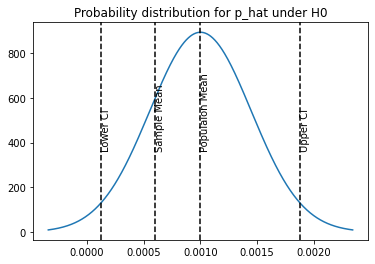

	Difference between sample mean and population mean:-0.0004
	95% Mass quantiles:(0.0001, 0.0019)
Discrepancy statistics -----------------------------------------------------
	d_n = (p_hat - p0)/sqrt(p0 * (1 - p0)/n)


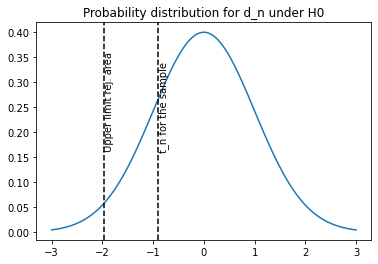

	Value of t_n for the given sample: -0.8948747402853658
	Rejection area: {values for d_n such that d_n<= -1.9600}
	Accepted area: {values for d_n such that d_n> -1.9600}
	p-value: 0.1854


In [138]:
binomail_values(p0=0.001, n=5000, n_success=3)